In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
import numpy as np


In [8]:
# Load the dataset
df = pd.read_csv(r'c:\Users\Admin\Downloads\US_Accidents_March23.csv')
df['Start_Time'] = pd.to_datetime(df['Start_Time'],format='%Y-%m-%d %H:%M:%S.%f', errors='coerce')

# Extract hour, day of the week, and month for time-based analysis
df['Hour'] = df['Start_Time'].dt.hour
df['Day_of_Week'] = df['Start_Time'].dt.day_name()
df['Month'] = df['Start_Time'].dt.month_name()

# Preview the first few rows
df.head()


,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Hour,Day_of_Week,Month
0,A-1,Source2,3,NaT,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,Night,Night,Night,Night,NaN,NaN,NaN
1,A-2,Source2,2,NaT,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,Night,Night,Night,Day,NaN,NaN,NaN
2,A-3,Source2,2,NaT,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,True,False,Night,Night,Day,Day,NaN,NaN,NaN
3,A-4,Source2,3,NaT,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,Night,Day,Day,Day,NaN,NaN,NaN
4,A-5,Source2,2,NaT,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,True,False,Day,Day,Day,Day,NaN,NaN,NaN


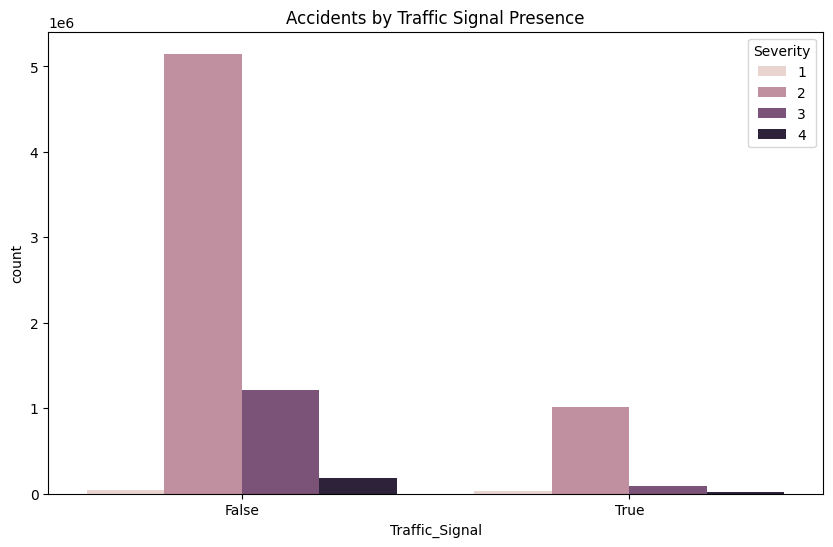

In [10]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Traffic_Signal', hue='Severity', data=df)
plt.title('Accidents by Traffic Signal Presence')
plt.show()

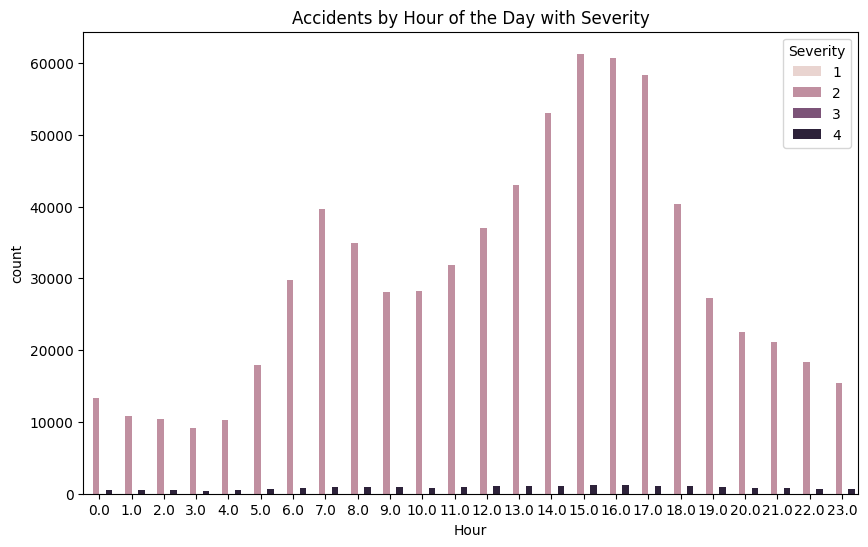

In [12]:

plt.figure(figsize=(10, 6))
sns.countplot(x='Hour', data=df, hue='Severity')
plt.title('Accidents by Hour of the Day with Severity')
plt.show()

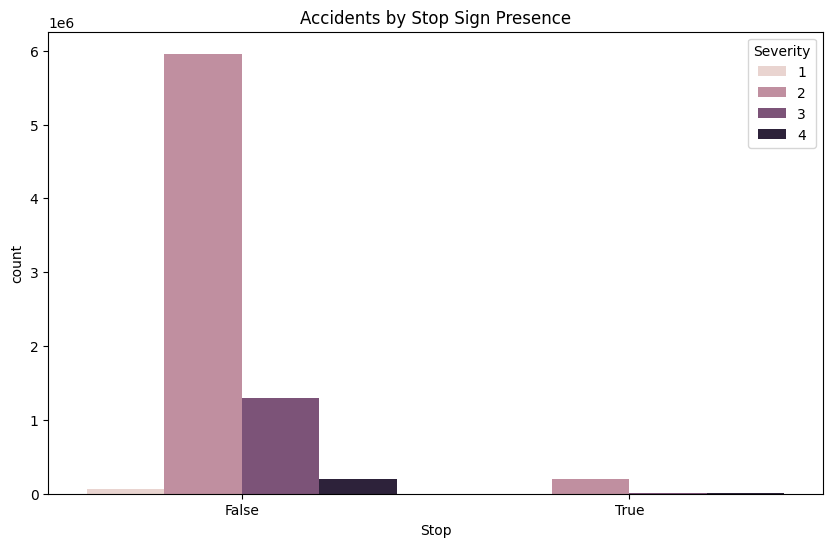

In [13]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Stop', hue='Severity', data=df)
plt.title('Accidents by Stop Sign Presence')
plt.show()

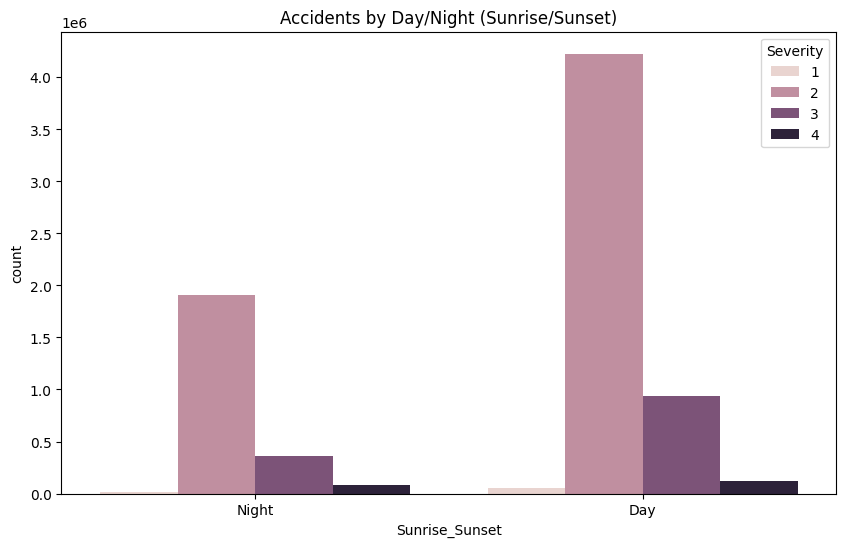

In [14]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Sunrise_Sunset', hue='Severity', data=df)
plt.title('Accidents by Day/Night (Sunrise/Sunset)')
plt.show()

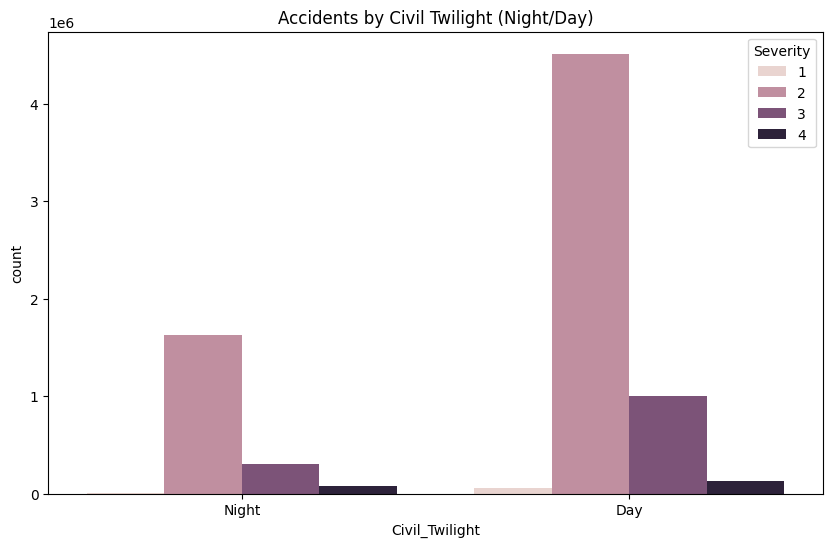

c:\Users\Admin\AppData\Local\Programs\Microsoft VS Code


In [17]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Civil_Twilight', hue='Severity', data=df)
plt.title('Accidents by Civil Twilight (Night/Day)')
plt.show()


In [16]:
# Create a base map
m = folium.Map(location=[37.0902, -95.7129], zoom_start=5)

# Filter for accidents with valid lat/long values
df_geo = df.dropna(subset=['Start_Lat', 'Start_Lng'])

# Prepare the data for the heatmap
heat_data = [[row['Start_Lat'], row['Start_Lng']] for index, row in df_geo.iterrows()]

# Add heatmap layer
HeatMap(heat_data).add_to(m)

# Save map to HTML file
m.save('accident_hotspots.html')

